In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('file.csv')

In [3]:
data.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN


## Q. 1) Convert the Datatype of 'Date' column to Date-Time format.

In [4]:
data['date'] = pd.to_datetime(data['date'])

In [5]:
data.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN


## Q. 2) Add a new column ''year'' in the dataframe, which contains years only.

In [6]:
data['year'] = data['date'].dt.year

In [7]:
data.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995


## (2.B) Add a new column ''month'' as 2nd column in the dataframe, which contains month only.

In [8]:
data.insert(1,"month",data['date'].dt.month)

In [9]:
data.head(2)

,date,month,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,1,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,2,city of london,82203,E09000001,7.0,NaN,1995


## Q. 3) Remove the columns 'year' and 'month' from the dataframe.

In [12]:
data.drop(['month','year'],axis =1, inplace=True)

In [13]:
data.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN


## Q. 4) Show all the records where 'No. of Crimes' is 0. And, how many such records are there ?

In [14]:
data[data['no_of_crimes'] == 0]

,date,area,average_price,code,houses_sold,no_of_crimes
72,2001-01-01,city of london,284262,E09000001,24.0,0.0
73,2001-02-01,city of london,198137,E09000001,37.0,0.0
74,2001-03-01,city of london,189033,E09000001,44.0,0.0
75,2001-04-01,city of london,205494,E09000001,38.0,0.0
76,2001-05-01,city of london,223459,E09000001,30.0,0.0
...,...,...,...,...,...,...
178,2009-11-01,city of london,397909,E09000001,11.0,0.0
179,2009-12-01,city of london,411955,E09000001,16.0,0.0
180,2010-01-01,city of london,464436,E09000001,20.0,0.0
181,2010-02-01,city of london,490525,E09000001,9.0,0.0


In [16]:
data[data['no_of_crimes'] == 0].count()

date             104
area             104
average_price    104
code             104
houses_sold      104
no_of_crimes     104
dtype: int64

In [17]:
data.groupby('no_of_crimes').get_group(0).count()

date             104
area             104
average_price    104
code             104
houses_sold      104
no_of_crimes     104
dtype: int64

In [35]:
data['area'].unique()

array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'tower hamlets', 'greenwich', 'hackney', 'south east',
       'hammersmith and fulham', 'haringey', 'harrow', 'havering',
       'hillingdon', 'hounslow', 'islington', 'kensington and chelsea',
       'kingston upon thames', 'lambeth', 'lewisham', 'merton', 'newham',
       'redbridge', 'richmond upon thames', 'southwark', 'sutton',
       'waltham forest', 'wandsworth', 'westminster', 'inner london',
       'outer london', 'north east', 'north west', 'yorks and the humber',
       'east midlands', 'west midlands', 'east of england', 'london',
       'south west', 'england'], dtype=object)

## Q. 5) What is the maximum & minimum 'average_price' per year in england ?

In [36]:
dataEngland = data[data['area'].str.contains('england') ]
dataEngland.groupby(data['date'].dt.year).average_price.max()

date
1995     57242
1996     58964
1997     66206
1998     71680
1999     83819
2000     96195
2001    111665
2002    141858
2003    157713
2004    175981
2005    179512
2006    194903
2007    209624
2008    207691
2009    185387
2010    195063
2011    192616
2012    196204
2013    207270
2014    227303
2015    252915
2016    275945
2017    289022
2018    294035
2019    293497
2020    286999
Name: average_price, dtype: int64

<Axes: xlabel='date'>

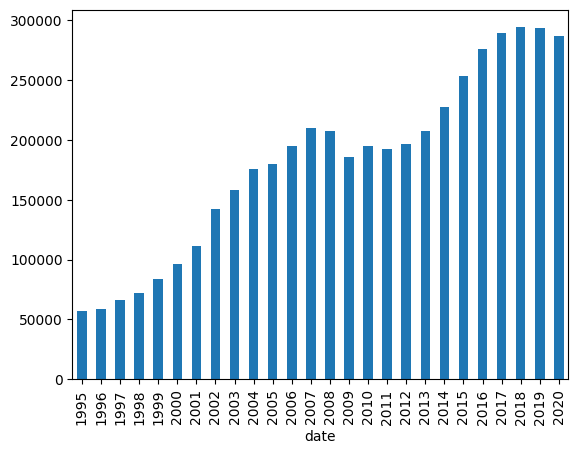

In [37]:
dataEngland.groupby(data['date'].dt.year).average_price.max().plot(kind='bar')

In [38]:
dataEngland.groupby(data['date'].dt.year).average_price.min()

date
1995     52788
1996     52333
1997     55789
1998     61659
1999     65522
2000     75219
2001     84245
2002     96215
2003    121610
2004    139719
2005    158572
2006    166544
2007    181824
2008    165795
2009    159340
2010    174458
2011    173046
2012    174161
2013    176816
2014    188265
2015    202856
2016    220361
2017    231593
2018    240428
2019    243281
2020    247355
Name: average_price, dtype: int64

<Axes: xlabel='date'>

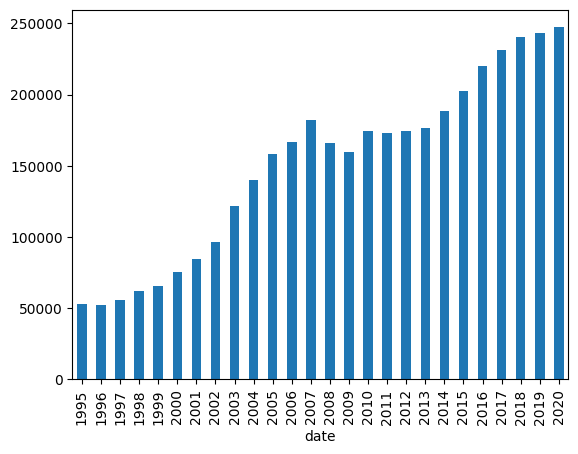

In [39]:
dataEngland.groupby(data['date'].dt.year).average_price.min().plot(kind = 'bar')

<Axes: title={'center': "The minimum 'average_price' per year in england"}, xlabel='date'>

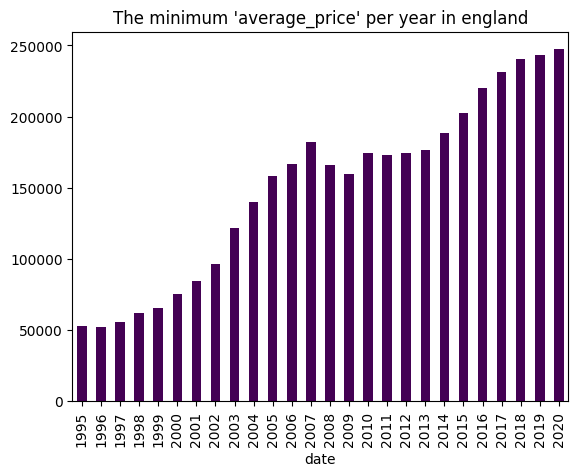

In [42]:
import matplotlib.pyplot as plt
min_data = dataEngland.groupby(data['date'].dt.year).average_price.min()
plt.title("The minimum 'average_price' per year in england")
min_data.plot(kind= 'bar', colormap='viridis')

## Q. 6) What is the Maximum & Minimum No. of Crimes recorded per area ?

In [47]:
data.groupby('area').no_of_crimes.max().sort_values(ascending = False)

area
westminster               7461.0
lambeth                   4701.0
camden                    4558.0
southwark                 3821.0
newham                    3668.0
hackney                   3466.0
ealing                    3401.0
islington                 3384.0
tower hamlets             3316.0
croydon                   3263.0
haringey                  3199.0
wandsworth                3051.0
waltham forest            2941.0
brent                     2937.0
barnet                    2893.0
greenwich                 2853.0
hillingdon                2819.0
hounslow                  2817.0
lewisham                  2813.0
enfield                   2798.0
kensington and chelsea    2778.0
hammersmith and fulham    2645.0
bromley                   2637.0
redbridge                 2560.0
barking and dagenham      2049.0
havering                  1956.0
bexley                    1914.0
harrow                    1763.0
merton                    1623.0
richmond upon thames      1551.0
sutto

In [48]:
data.groupby('area').no_of_crimes.min().sort_values(ascending = True)

area
city of london               0.0
kingston upon thames       692.0
richmond upon thames       700.0
sutton                     787.0
merton                     819.0
bexley                     860.0
harrow                     937.0
havering                  1130.0
barking and dagenham      1217.0
hammersmith and fulham    1323.0
kensington and chelsea    1347.0
bromley                   1441.0
hillingdon                1445.0
redbridge                 1487.0
greenwich                 1513.0
hounslow                  1529.0
haringey                  1536.0
waltham forest            1575.0
wandsworth                1582.0
enfield                   1635.0
tower hamlets             1646.0
lewisham                  1675.0
barnet                    1703.0
brent                     1850.0
hackney                   1870.0
islington                 1871.0
ealing                    1871.0
croydon                   2031.0
camden                    2079.0
newham                    2130.0
south

## Q. 7) Show the total count of records of each area, where average price is less than 100000.

In [49]:
data[data['average_price'] < 100000].area.value_counts()

area
north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
bexley                   64
waltham forest           64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
sutton                   54
enfield                  54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
hounslow                 41
lambeth                  41
brent                    40
london                   39
merton                   35
haringey                 33
bromley                  33
ealing                   31
inner london             31
harrow                   30
kingston upon t

In [50]:
data[data['average_price'] < 100000].groupby('area').count()

,date,average_price,code,houses_sold,no_of_crimes
area,,,,,
barking and dagenham,85,85,85,85,13
barnet,25,25,25,25,0
bexley,64,64,64,64,0
brent,40,40,40,40,0
bromley,33,33,33,33,0
city of london,11,11,11,11,0
croydon,57,57,57,57,0
ealing,31,31,31,31,0
east midlands,96,96,96,96,0
